# Goodreads Books with Genre
## Data Processing

In [ ]:
import kagglehub
import pandas as pd
import statistics
import matplotlib.pyplot as plt

Start with data processing! Import the data, parse through data to make sure they are all the correct types, and create a DataFrame

In [ ]:
# Download latest version
file = kagglehub.dataset_download("middlelight/goodreadsbookswithgenres")

df = pd.read_csv('./goodreadsbookswithgenres/Goodreads_books_with_genres.csv')
df.head()


,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Adve..."


In [ ]:
print("(cols, rows):", df.shape)
df.dtypes

(cols, rows): (11127, 13)


Book Id                 int64
Title                  object
Author                 object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
genres                 object
dtype: object

In [ ]:
df.count()

Book Id               11127
Title                 11127
Author                11127
average_rating        11127
isbn                  11127
isbn13                11127
language_code         11127
num_pages             11127
ratings_count         11127
text_reviews_count    11127
publication_date      11127
publisher             11127
genres                11030
dtype: int64

The `count()` function shows that the only column that has null values is genre. Since majority of our questions deal with genre, we are going to remove the books without a genre. Since the genres column is important, we are going to clean up the data by turning the string into an array.

In [ ]:
# Drop all the rows without a genre
df = df.dropna(how='any')

# Turn the genres column from a string into an array
df.loc[:, 'genres'] = df['genres'].apply(lambda input: input.split(';'))
df.head()


,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."


Next, since we will be using the publication date, we want to convert the string into a datetime object for easier computation.

In [ ]:
# Convert to datetime
df.loc[:, 'publication_date'] = df['publication_date'].apply(lambda date: pd.to_datetime(date,  errors='coerce'))

# Look at rows that are NaT (not a time)
nat_rows = df[df['publication_date'].isna()]
nat_rows

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
8180,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books,"[Mystery, Fiction, Mystery,Crime, Thriller,Mys..."
11098,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire,"[History, Nonfiction, Cultural,France, Histori..."


Since there are only two rows without a date, we feel comfortable removing them, since they will not make a huge impact on our data.

In [ ]:
# Remove the rows with NaT
df = df.dropna(subset=['publication_date'])
df.head()

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01 00:00:00,Scholastic,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01 00:00:00,Scholastic Inc.,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13 00:00:00,Scholastic,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."


Now let's do some basic exploration of the data. Looking at the range of publication dates, genres, number of pages, publishers, average rating.

In [ ]:
# Range of publication dates
min_date = df['publication_date'].min()
max_date = df['publication_date'].max()
print("Publication date ranges from", min_date, "to", max_date)

# Range of number of pages
min_pages = df['num_pages'].min()
max_pages = df['num_pages'].max()
print("Number of pages ranges from", min_pages, "to", max_pages)

# Range of average rating
min_average_rating = df['average_rating'].min()
max_average_rating = df['average_rating'].max()
print("Average rating ranges from", min_average_rating, "to", max_average_rating)

# Range of number of ratings
min_ratings = df['ratings_count'].min()
max_ratings = df['ratings_count'].max()
print("Number of ratings ranges from", min_ratings, "to", max_ratings)

# List of publishers
unique_publishers = df['publisher'].unique()
print("List of publishers:", unique_publishers)

# List of genres
all_genres = df['genres'].explode()
unique_genres = all_genres.unique()
print("List of first 25 genres (including subgenres):", unique_genres[:25])
print("Number of genres (including subgenres):", len(unique_genres))

Publication date ranges from 1900-01-01 00:00:00 to 2020-03-31 00:00:00
Number of pages ranges from 0 to 6576
Average rating ranges from 0.0 to 5.0
Number of ratings ranges from 0 to 4597666
List of publishers: ['Scholastic Inc.' 'Scholastic' 'Nimble Books' ... 'Suma'
 'Panamericana Editorial' 'Editorial Presença']
List of first 25 genres (including subgenres): ['Fantasy' 'Young Adult' 'Fiction' 'Fantasy,Magic' 'Childrens' 'Adventure'
 'Audiobook' 'Childrens,Middle Grade' 'Classics' 'Science Fiction Fantasy'
 'Fantasy,Supernatural' 'Mystery' 'Fantasy,Paranormal' 'Novels'
 'Paranormal,Wizards' 'Science Fiction' 'Humor' 'Humor,Comedy'
 'European Literature,British Literature' 'Nonfiction' 'Science' 'History'
 'Science,Physics' 'Science,Popular Science' 'Historical']
Number of genres (including subgenres): 890


That is a lot of genres! If you notice, some of these are subgenres. For example 'Fantasy,Epic'. To make it easier to graph later, we are going to make a list of all the 'main' genres (i.e. those without a subgenre attached).

In [ ]:
main_genres = df['genres'].apply(lambda x: [genre for genre in x if ',' not in genre]).explode()
unique_main_genres = main_genres.unique()

print("List of first 25 genres:", unique_main_genres[:25])
print("Number of genres:", len(unique_main_genres))

List of first 25 genres: ['Fantasy' 'Young Adult' 'Fiction' 'Childrens' 'Adventure' 'Audiobook'
 'Classics' 'Science Fiction Fantasy' 'Mystery' 'Novels' 'Science Fiction'
 'Humor' 'Nonfiction' 'Science' 'History' 'Historical' 'Philosophy'
 'Unfinished' 'Travel' 'Biography' 'Reference'
 'The United States Of America' 'Literature' 'Art' 'Media Tie In']
Number of genres: 235


Next, we are going to remove the books that have a page length of 0. Since a book without pages is not really considered a book to us.

In [ ]:
# Remove rows where 'num_pages' is equal to 0
df = df[df['num_pages'] != 0]

In [ ]:
# Genres with the most books
top_genres = main_genres.value_counts().head(25)
top_genres

genres
Fiction                    6933
Classics                   3333
Nonfiction                 3107
Literature                 2845
Fantasy                    2550
Novels                     2529
Audiobook                  1637
History                    1616
Mystery                    1603
Romance                    1547
Historical                 1396
Contemporary               1358
Adventure                  1304
Adult                      1263
Young Adult                1259
Philosophy                 1234
Science Fiction            1166
Childrens                  1157
Humor                      1129
Thriller                   1099
Biography                  1071
Literary Fiction           1049
Science Fiction Fantasy     968
Short Stories               871
Horror                      748
Name: count, dtype: int64

In order to get a better understanding of how many books are in each genre, let's graph it! Reminder that books can fall into multiple genres, so they will count for all of them.

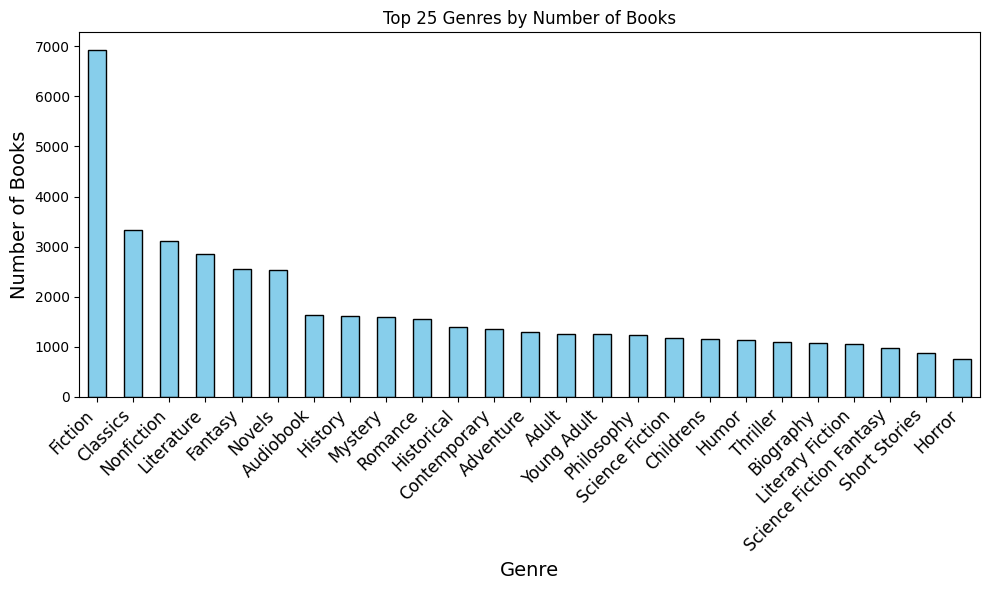

In [ ]:
# Plot the top 25 genres
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 25 Genres by Number of Books')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Test 1: Does a higher number of ratings lead to a lower average rating?
### We'll compare the number of ratings to the average rating for *each book*.


*   HO: Total number of ratings for individual books does not have an effect on average rating.
*   HA: Total number of ratings for individual books does have an effect on average rating.

For this purpose we will use the Pearson correlation coeffient.

Let's look at a dataframe displaying data just for the top 25 genres.

In [ ]:
top_genres_list = top_genres.index.tolist()

df_top_genres = df[df['genres'].apply(lambda x: any(genre in top_genres_list for genre in x))]
df_top_genres

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01 00:00:00,Scholastic,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01 00:00:00,Scholastic Inc.,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13 00:00:00,Scholastic,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,2004-12-21 00:00:00,Da Capo Press,"[Fiction, Writing,Essays, Literature,American,..."
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,1988-12-01 00:00:00,Penguin Books,"[Fiction, Science Fiction, Literature, Novels,..."
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,1993-08-01 00:00:00,Penguin Books,"[Historical,Historical Fiction, Fiction, Novel..."
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2007-02-27 00:00:00,Ecco,"[Nonfiction, Sociology, Social Issues,Poverty,..."


Note: there are fewer than 70 books with an average rating less than 3.0, which likely would affect our test results. Here's a dataframe that shows this:

In [ ]:
df.sort_values('average_rating').head(70)

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
11031,45259,Anthony Thwaite: In Conversation With Peter Da...,Peter Dale/Ian Hamilton/Anthony Thwaite,0.00,0953284123,9780953284122,eng,96,0,0,1999-12-09 00:00:00,Between the Lines Productions,[Literary Criticism]
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.00,1932206086,9781932206081,eng,304,0,0,2003-01-01 00:00:00,Frederick P. Lenz Foundation for American Budd...,[Spiritual life]
6880,25903,I'll Be Home Before Midnight and I Won't Get P...,Anthony E. Wolf,0.00,0394755669,9780394755663,eng,288,0,0,1988-05-12 00:00:00,Knopf Doubleday Publishing Group,[Social Science]
10142,41044,Day and Night,Better Homes and Gardens,0.00,0696018829,9780696018824,eng,32,0,1,1989-03-01 00:00:00,Meredith Corporation,[Juvenile Nonfiction]
9441,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,0.00,0805850848,9780805850840,eng,241,0,0,2006-08-05 00:00:00,Routledge,[Education]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,4221,The Guide to Dan Brown's the Solomon Key,Greg Taylor,2.98,0875168167,9780875168166,en-US,183,34,2,2005-09-30 00:00:00,DeVorss & Company,[Fiction]
9159,35760,Mistaken Identity,Nayantara Sahgal,2.98,8172235224,9788172235222,eng,324,0,0,2016-12-30 00:00:00,Harper Collins,"[Fiction, Novels]"
96,159,Dinner with Anna Karenina,Gloria Goldreich,2.99,0778322270,9780778322276,eng,360,411,65,2006-01-28 00:00:00,Mira Books,"[Fiction, Writing,Books About Books, Contempor..."
10213,41378,Flirting With Danger,Kate Walker,3.00,037311818X,9780373118182,eng,188,12,4,1996-06-01 00:00:00,Harlequin,"[Harlequin,Harlequin Presents, Romance]"


Note: there are also no average ratings 'x' where 0.00 < x < 2.00. Again, this likely would affect our test results. Here's a dataframe that shows this:

In [ ]:
df.sort_values('average_rating').head(30)

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
11031,45259,Anthony Thwaite: In Conversation With Peter Da...,Peter Dale/Ian Hamilton/Anthony Thwaite,0.00,0953284123,9780953284122,eng,96,0,0,1999-12-09 00:00:00,Between the Lines Productions,[Literary Criticism]
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.00,1932206086,9781932206081,eng,304,0,0,2003-01-01 00:00:00,Frederick P. Lenz Foundation for American Budd...,[Spiritual life]
6880,25903,I'll Be Home Before Midnight and I Won't Get P...,Anthony E. Wolf,0.00,0394755669,9780394755663,eng,288,0,0,1988-05-12 00:00:00,Knopf Doubleday Publishing Group,[Social Science]
10142,41044,Day and Night,Better Homes and Gardens,0.00,0696018829,9780696018824,eng,32,0,1,1989-03-01 00:00:00,Meredith Corporation,[Juvenile Nonfiction]
9441,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,0.00,0805850848,9780805850840,eng,241,0,0,2006-08-05 00:00:00,Routledge,[Education]
7147,27416,Mythographi Graeci 1: Apollodori Bibliotheca ...,Apollodorus/Richard Wagner,0.00,3598715439,9783598715433,grc,335,0,0,1998-07-15 00:00:00,K.G. Saur Verlag,[History]
5325,19257,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.00,0916724948,9780916724948,eng,63,0,0,1997-12-31 00:00:00,Arts Publications,[Art]
6383,24010,"Laguna I Love You: The Best of ""Our Town",John Weld/Phil Interlandi,0.00,1564741575,9781564741578,eng,285,0,0,1996-03-01 00:00:00,Fithian Press,[History]
10501,42758,The Fantastic Vampire: Studies in the Children...,James Craig Holte,0.00,0313309337,9780313309335,eng,176,0,0,2002-03-30 00:00:00,Greenwood Press,[Literary Criticism]
7576,29091,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel/Michael John Petry,0.00,9027712050,9789027712059,eng,210,0,0,1981-05-31 00:00:00,Springer,[History]


Let's view the number of ratings vs the average ratings, for each book, on a scatter plot. This would help us visualize whether a relationship exists between the two variables, and the direction of that relationship.

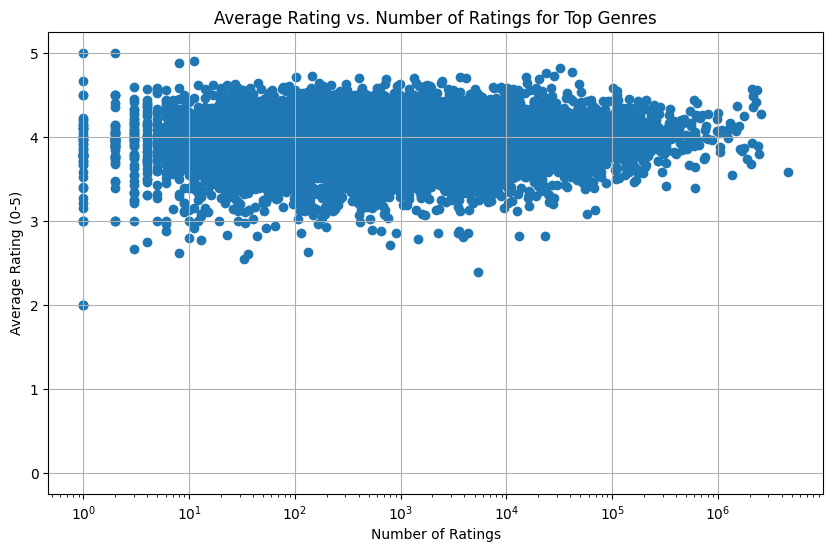

In [ ]:
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_top_genres['ratings_count'], df_top_genres['average_rating'])
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating (0-5)")
plt.title("Average Rating vs. Number of Ratings for Top Genres")
plt.xscale('log')

plt.grid(True)
plt.show()

Because we are testing correlation between the two variables, we can apply Pearson's correlation test on the dataframe with just the top genres.

In [ ]:
# apply Pearson's correlation test
from scipy import stats
result = stats.pearsonr(df_top_genres['ratings_count'], df_top_genres['average_rating'])
result.pvalue

np.float64(1.1921141854582486e-05)

The p-value of approximately 1.192 x 10^-5 is much smaller than the significance level of 0.05. Therefore, we can reject the null hypothesis, which had stated that the total number of ratings didn't have a significant effect on the average ratings for books. The number of ratings a book has does effect the average rating for the book.

This makes sense because the more people that read a book, who have differing opinions and world experiences, will provide more diverse ratings.

# Test 2: Does the book author and genre have a relationship?
### We'll check for a relationship between the top 10 authors and what we defined as the top genres.
- HO: The author of the book does not have an effect on the book genre.
- HA: The author of the book does have an effect on the book genre.<br><br>
For this purpose we will use a Chi-square test.

In [ ]:
from scipy.stats import chi2_contingency

# Top 10 authors in published books
topAuthors = df["Author"].value_counts().head(10).index
filteredData = df[df["Author"].isin(topAuthors)].copy()

# Expects the earlier genre in the list to have a higher precedence
def getTopGenre(lst):
    for genre in lst:
        if genre in top_genres:
            return genre
    return None


filteredData["Primary_Genre"] = filteredData["genres"].apply(lambda lst: getTopGenre(lst))

contingencyTable = pd.crosstab(filteredData["Author"], filteredData["Primary_Genre"])
chi2Stat, pValue, dof, expected = chi2_contingency(contingencyTable)

print(f"Chi-squared Statistic: {chi2Stat}")
print(f"P-value: {pValue}")
print(f"Degrees of Freedom: {dof}")

Chi-squared Statistic: 1205.712674055884
P-value: 6.8274498139835365e-211
Degrees of Freedom: 63


The p-value is below the significance level of 0.05 so we reject the null hypothesis. The alternative hypothesis, the author of the book does have an effect on the book genre, holds true.<br><br>
As we will see in the heatmap plot, the top ten authors we analyzed usually prefer to stick to one specific genre that they are comfortable with. There are some authors such as Stephen King and P.G. Wodehouse whose book genres are particularly homogenous. Overall, the conclusions made from this test appear to make sense as many well-known authors, expect for a few exceptions, stick to one genre.

### We can also see which authors play the largest role in rejecting the null hypothesis.
Chi-square heatmap reference: https://acastat.net/statbook/chisqresid.htm

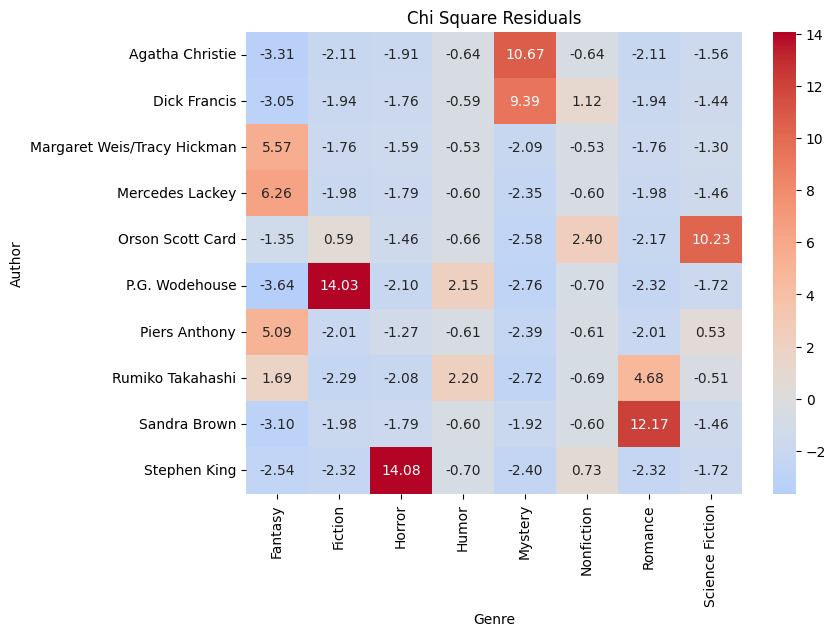

In [ ]:
import seaborn as sns
import numpy as np

residuals = (contingencyTable - expected) / np.sqrt(expected)

plt.figure(figsize=(8, 6))
sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0, fmt=".2f")

plt.xlabel("Genre")
plt.ylabel("Author")
plt.title("Chi Square Residuals")

plt.show()

Any cell with an absolute value greater than 2 is considered a major influence on the chi-square test statistic.

# Test 3: Does page count vary significantly between fiction and non-fiction books?

First, let's take a look at the distribution of page count overall.

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["num_pages"], bins=20) # plotting page numbers in histogram
plt.show()

It seems there's some outliers with page counts in the thousands. Let's take a look at them.

In [ ]:
display(df[df["num_pages"] >= 2000])

It looks like a lot of these are collections of multiple books, and there's very few of them compared to the size of our dataset, so it should be fine to remove them. Let's do that and see what our distribution looks like now.

In [ ]:
filtered_df = df[df["num_pages"] < 2000]
plt.hist(filtered_df["num_pages"], bins=50)
plt.show()

Now we can see that there is a strange spike of books with an extremely small number of pages (between 0 and 40). Closer investigation reveals that many of these data points are probably incorrect, as they list exactly 0 pages. Let's remove all books with page counts less than 40.

In [ ]:
filtered_df = filtered_df[filtered_df["num_pages"] >= 40]
plt.hist(filtered_df["num_pages"], bins=50)
plt.show()
display(filtered_df.sort_values(by=["num_pages"]))

Okay, this seems more reasonable now. Next, let's conduct a hypothesis test to determine if the page counts are significantly different between fiction and non-fiction books.

We already know from our histogram that the distribution of page number is likely not normal. So rather than a t-test, we'll be better off using the Mann-Whitney U Test. For good measure, let's plot the page distributions of both fiction and nonfiction books as well.

H0: The distribution of page number for fiction and non-fiction books are not significantly different. HA: The distribution of page number for fiction and non-fiction books are significantly different.

The significance level will be 0.05.

In [ ]:
# separate data into two groups: fiction and nonfiction
mask = filtered_df.genres.apply(lambda x: "Fiction" in x)
fiction = filtered_df[mask]
mask2 = filtered_df.genres.apply(lambda x: "Nonfiction" in x)
nonfiction = filtered_df[mask2]

plt.hist(fiction["num_pages"],bins=20)
plt.hist(nonfiction["num_pages"],bins=20)
plt.show()

# conduct mann-whitney u test
import scipy
result = scipy.stats.mannwhitneyu(fiction["num_pages"], nonfiction["num_pages"])
display(result.pvalue)

Our p-value is 0.0513, just barely enough for us to conclude that the page number distributions of fiction and non-fiction books are **not significantly different.**